In [4]:
import pandas as pd
import numpy as np
import dtale

ModuleNotFoundError: No module named 'dtale'

In [16]:
df = pd.read_csv("disney_movies_total_gross.csv",parse_dates=["release_date"])

In [17]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   mpaa_rating               523 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


In [19]:
df.drop(columns = ['mpaa_rating'], inplace = True)
df

,movie_title,release_date,genre,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,84300000,2188229052
2,Fantasia,1940-11-13,Musical,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,65000000,1078510579
4,Cinderella,1950-02-15,Drama,85000000,920608730
...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,232532923,232532923
577,Moana,2016-11-23,Adventure,246082029,246082029


In [20]:
df[df.genre.isna()]

,movie_title,release_date,genre,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,0,0
22,Herbie Goes to Monte Carlo,1977-06-24,NaN,28000000,105847527
23,The Black Hole,1979-12-21,NaN,35841901,120377374
24,Midnight Madness,1980-02-08,NaN,2900000,9088096
25,The Last Flight of Noah’s Ark,1980-06-25,NaN,11000000,34472116
26,The Devil and Max Devlin,1981-01-01,NaN,16000000,48517980
121,Newsies,1992-04-08,NaN,2706352,5497481
122,Passed Away,1992-04-24,NaN,4030793,8187848
128,A Gun in Betty Lou's Handbag,1992-08-21,NaN,3591460,7295423
146,Bound by Honor,1993-04-16,NaN,4496583,9156084


In [21]:
df[df.duplicated()]

,movie_title,release_date,genre,total_gross,inflation_adjusted_gross


In [12]:
df[df.total_gross == 0]

,movie_title,release_date,genre,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,0,0
27,Amy,1981-03-20,Drama,0,0
29,Condorman,1981-08-07,Action,0,0
355,Frank McKlusky C.I.,2002-01-01,NaN,0,0


In [13]:
df.nlargest(1, "inflation_adjusted_gross")

,movie_title,release_date,genre,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,184925485,5228953251


In [14]:
df.nlargest(1, "total_gross")

,movie_title,release_date,genre,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,936662225,936662225


In [22]:

df["release_year"] = df["release_date"].apply(lambda x: x.year)

In [23]:
df

,movie_title,release_date,genre,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,85000000,920608730,1950
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,12545979,12545979,2016
575,Queen of Katwe,2016-09-23,Drama,8874389,8874389,2016
576,Doctor Strange,2016-11-04,Adventure,232532923,232532923,2016
577,Moana,2016-11-23,Adventure,246082029,246082029,2016


In [43]:
agg = df.groupby(["release_year"]).total_gross.sum().nlargest(10).reset_index()

In [33]:
df.groupby(["release_year"]).apply(lambda x: x.nlargest(10, "total_gross"))

movie_title release_date      genre  \
release_year                                                                
1937         0    Snow White and the Seven Dwarfs   1937-12-21    Musical   
1940         1                          Pinocchio   1940-02-09  Adventure   
             2                           Fantasia   1940-11-13    Musical   
1946         3                  Song of the South   1946-11-12  Adventure   
1950         4                         Cinderella   1950-02-15      Drama   
...                                           ...          ...        ...   
2016         577                            Moana   2016-11-23  Adventure   
             576                   Doctor Strange   2016-11-04  Adventure   
             570  Alice Through the Looking Glass   2016-05-27  Adventure   
             573                    Pete’s Dragon   2016-08-12  Adventure   
             572                          The BFG   2016-07-01  Adventure   

                  total_gross  inflation_adjusted_gross  release_year  
release_year                                                           
1937         0      184925485                5228953251          1937  
1940         1       84300000                2188229052          1940  
             2       83320000                2187090808          1940  
1946         3       65000000                1078510579          1946  
1950         4       85000000                 920608730          1950  
...                       ...                       ...           ...  
2016         577    246082029                 246082029          2016  
             576    232532923                 232532923          2016  
             570     77042381                  77042381          2016  
             573     76233151                  76233151          2016  
             572     55483770                  55483770          2016  

[352 rows x 6 columns]

In [44]:
agg

,release_year,total_gross
0,2016,2873393105
1,2015,2495662696
2,2013,1821352070
3,2003,1564114393
4,2010,1518975880
5,2014,1514179473
6,2012,1452972057
7,2007,1436787754
8,2006,1427356974
9,1998,1229279167


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

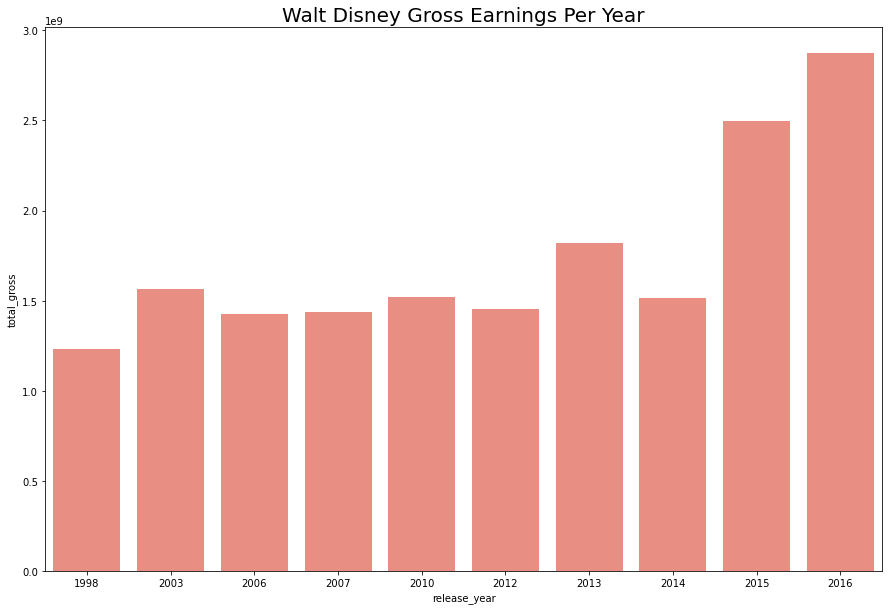

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(x = "release_year", y= "total_gross", data = agg, color="salmon")
plt.title("Walt Disney Gross Earnings Per Year", fontsize=20)
plt.show()

In [51]:
df_gen = df.copy()

In [54]:
df_gen.dropna(subset = ["genre"], inplace=True)

In [55]:
df_gen

,movie_title,release_date,genre,total_gross,inflation_adjusted_gross,release_year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,85000000,920608730,1950
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,12545979,12545979,2016
575,Queen of Katwe,2016-09-23,Drama,8874389,8874389,2016
576,Doctor Strange,2016-11-04,Adventure,232532923,232532923,2016
577,Moana,2016-11-23,Adventure,246082029,246082029,2016


In [58]:
agg_movie_cnt = df.groupby(["genre"]).movie_title.count().reset_index()

In [59]:
agg_movie_cnt

,genre,movie_title
0,Action,40
1,Adventure,129
2,Black Comedy,3
3,Comedy,182
4,Concert/Performance,2
5,Documentary,16
6,Drama,114
7,Horror,6
8,Musical,16
9,Romantic Comedy,23


In [60]:
agg_genre_gross = df.groupby(["genre"]).total_gross.sum().reset_index()


,genre,total_gross
0,Action,4184563282
1,Adventure,16389069453
2,Black Comedy,97543212
3,Comedy,8119619678
4,Concert/Performance,103456466
5,Documentary,180685619
6,Drama,4106972970
7,Horror,87068872
8,Musical,1157284155
9,Romantic Comedy,1152206855


In [63]:
agg_genre_gross.sort_values(by = "total_gross", ascending = False)

,genre,total_gross
1,Adventure,16389069453
3,Comedy,8119619678
0,Action,4184563282
6,Drama,4106972970
10,Thriller/Suspense,1406806519
8,Musical,1157284155
9,Romantic Comedy,1152206855
11,Western,359011459
5,Documentary,180685619
4,Concert/Performance,103456466


In [65]:
agg_movie_cnt.sort_values("movie_title", ascending = False)

,genre,movie_title
3,Comedy,182
1,Adventure,129
6,Drama,114
0,Action,40
10,Thriller/Suspense,24
9,Romantic Comedy,23
5,Documentary,16
8,Musical,16
11,Western,7
7,Horror,6


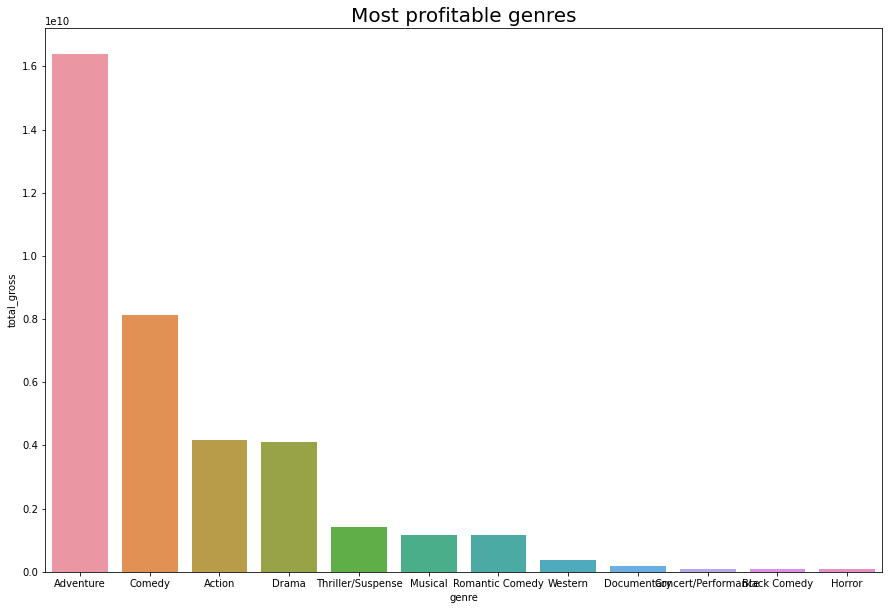

In [71]:
plt.figure(figsize=(15,10))
sns.barplot(x="genre", y="total_gross", data=agg_genre_gross, 
            order = agg_genre_gross.sort_values("total_gross", ascending = False).genre)
plt.title("Most profitable genres", fontsize=20)
plt.show()